<a href="https://colab.research.google.com/github/FernandaSzAdr/KNN_cromossome/blob/master/TesteRedesBinarias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers.core import Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
train_path = 'drive/My Drive/Base_CNN/Binarizado/Train'
test_path = 'drive/My Drive/Base_CNN/Binarizado/Test'
validation_path = 'drive/My Drive/Base_CNN/Binarizado/Validation'



---



## Implementação



*   Batch size = 32
*   Image size = 120x120



In [0]:
results = {}

In [0]:
bSize = 32

In [0]:
datagen = ImageDataGenerator(rescale=1/255.)

In [7]:
train_batches = datagen.flow_from_directory(train_path, target_size=(120, 120), 
                                            classes=['C', 'NC'], 
                                            batch_size=bSize)
test_batches = datagen.flow_from_directory(test_path, target_size=(120, 120), 
                                           classes=['C', 'NC'], 
                                           batch_size=bSize)
validation_batches = datagen.flow_from_directory(validation_path, 
                                                 target_size=(120, 120), 
                                                 classes=['C', 'NC'], 
                                                 batch_size=bSize)

Found 9769 images belonging to 2 classes.
Found 3053 images belonging to 2 classes.
Found 2442 images belonging to 2 classes.


In [0]:
stepsPerEpoche = len(train_batches)/bSize
validationSteps = len(validation_batches)/bSize

In [9]:
test_batches.class_indices

{'C': 0, 'NC': 1}



---



### 1 tentativa Accuracy: 78.52%


**Descrição**


*   Modelo descrito no artigo "Crowdsourcing for Chromosome Segmentation and Deep Classification"



In [0]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(120, 120, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(16, (3, 3), activation='relu'),
    Conv2D(16, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(8, (3, 3), activation='relu'),
    Conv2D(8, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(1024, activation='sigmoid'),
    Dense(512, activation='sigmoid'),
   
    Dense(2, activation='softmax')
]
)

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_1.hdf5', verbose=1, save_best_only=True)

In [13]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 103s - loss: 0.5593 - acc: 0.7250 - val_loss: 0.4886 - val_acc: 0.8229

Epoch 00001: val_loss improved from inf to 0.48864, saving model to weights_architecture_1.hdf5
Epoch 2/50
 - 92s - loss: 0.4874 - acc: 0.8125 - val_loss: 0.5387 - val_acc: 0.7708

Epoch 00002: val_loss did not improve from 0.48864
Epoch 3/50
 - 101s - loss: 0.5485 - acc: 0.7688 - val_loss: 0.6043 - val_acc: 0.7396

Epoch 00003: val_loss did not improve from 0.48864
Epoch 4/50
 - 91s - loss: 0.5433 - acc: 0.7750 - val_loss: 0.4260 - val_acc: 0.8542

Epoch 00004: val_loss improved from 0.48864 to 0.42604, saving model to weights_architecture_1.hdf5
Epoch 5/50
 - 90s - loss: 0.5579 - acc: 0.7594 - val_loss: 0.5231 - val_acc: 0.8438

Epoch 00005: val_loss did not improve from 0.42604
Epoch 6/50
 - 98s - loss: 0.5406 - acc: 0.7750 - val_loss: 0.4111 - val_acc: 0.8646

Epoch 00006: val_loss improved from 0.42604 to 0.41113, saving model to weights_architecture_1.hdf5
Epoch 7/50
 - 87s - loss: 0.4802 - acc:

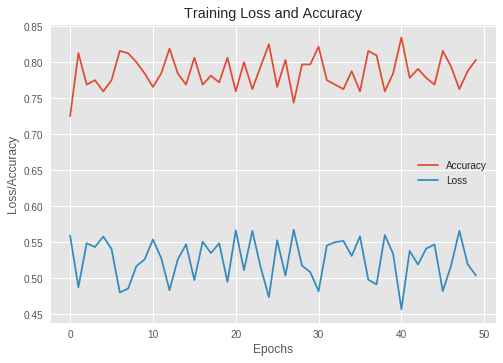

In [14]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_1.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_1.hdf5')

In [16]:
results['architecture_1'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 292s 9s/step


In [17]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_1'][0], 100 * results['architecture_1'][1]))

Test Loss: 0.5415669614449143 | Test Accuracy: 78.52%




---



### 2 tentativa Accuracy: 78.91%

**Descrição**


*   Modelo descrito no artigo "Crowdsourcing for Chromosome Segmentation and Deep Classification"
*   Alteração nas duas ultimas camadas Dense





In [0]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(120, 120, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(16, (3, 3), activation='relu'),
    Conv2D(16, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(8, (3, 3), activation='relu'),
    Conv2D(8, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
   
    Dense(2, activation='softmax')
]
)

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_2.hdf5', verbose=1, save_best_only=True)

In [21]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 49s - loss: 0.6405 - acc: 0.7406 - val_loss: 0.6119 - val_acc: 0.7917

Epoch 00001: val_loss improved from inf to 0.61194, saving model to weights_architecture_2.hdf5
Epoch 2/50
 - 47s - loss: 0.5737 - acc: 0.7375 - val_loss: 0.5460 - val_acc: 0.8438

Epoch 00002: val_loss improved from 0.61194 to 0.54595, saving model to weights_architecture_2.hdf5
Epoch 3/50
 - 47s - loss: 0.5285 - acc: 0.7750 - val_loss: 0.5899 - val_acc: 0.7708

Epoch 00003: val_loss did not improve from 0.54595
Epoch 4/50
 - 47s - loss: 0.4849 - acc: 0.8094 - val_loss: 0.5844 - val_acc: 0.7292

Epoch 00004: val_loss did not improve from 0.54595
Epoch 5/50
 - 47s - loss: 0.5029 - acc: 0.7937 - val_loss: 0.5767 - val_acc: 0.7500

Epoch 00005: val_loss did not improve from 0.54595
Epoch 6/50
 - 47s - loss: 0.5299 - acc: 0.7812 - val_loss: 0.5464 - val_acc: 0.7917

Epoch 00006: val_loss did not improve from 0.54595
Epoch 7/50
 - 47s - loss: 0.4844 - acc: 0.8063 - val_loss: 0.5674 - val_acc: 0.7604

Epoch

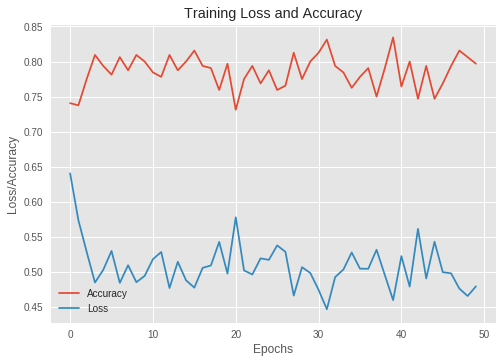

In [22]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_2.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_2.hdf5')

In [24]:
results['architecture_2'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 173s 5s/step


In [25]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_2'][0], 100 * results['architecture_2'][1]))

Test Loss: 0.54514145758003 | Test Accuracy: 78.91%


### 3 tentativa Accuracy: 87.65%

Modelo criado pelo **Lucas Valentim**

https://github.com/lucasvalentim/chromosome-recognizer/blob/master/chromosome_recognizer.ipynb

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_3.hdf5', verbose=1, save_best_only=True)

In [29]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 53s - loss: 1.4885 - acc: 0.6813 - val_loss: 0.4728 - val_acc: 0.8073

Epoch 00001: val_loss improved from inf to 0.47283, saving model to weights_architecture_3.hdf5
Epoch 2/50
 - 50s - loss: 1.1590 - acc: 0.7078 - val_loss: 0.6849 - val_acc: 0.7865

Epoch 00002: val_loss did not improve from 0.47283
Epoch 3/50
 - 50s - loss: 0.7638 - acc: 0.7406 - val_loss: 0.7942 - val_acc: 0.6042

Epoch 00003: val_loss did not improve from 0.47283
Epoch 4/50
 - 50s - loss: 0.6407 - acc: 0.7500 - val_loss: 0.8425 - val_acc: 0.4531

Epoch 00004: val_loss did not improve from 0.47283
Epoch 5/50
 - 50s - loss: 0.4458 - acc: 0.7969 - val_loss: 0.4957 - val_acc: 0.7812

Epoch 00005: val_loss did not improve from 0.47283
Epoch 6/50
 - 50s - loss: 0.4370 - acc: 0.8172 - val_loss: 0.4277 - val_acc: 0.8125

Epoch 00006: val_loss improved from 0.47283 to 0.42774, saving model to weights_architecture_3.hdf5
Epoch 7/50
 - 50s - loss: 0.4053 - acc: 0.8453 - val_loss: 0.4063 - val_acc: 0.8854

Epoch

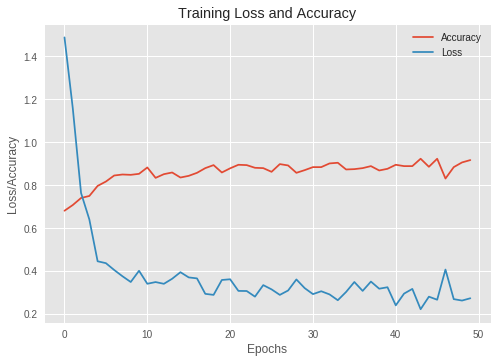

In [30]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_3.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_3.hdf5')

In [32]:
results['architecture_3'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 101s 3s/step


In [33]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_3'][0], 100 * results['architecture_3'][1]))

Test Loss: 0.3577259765006602 | Test Accuracy: 87.65%


### 4 tentativa Accuracy: 90.72%

Modelo adaptado do **Lucas Albertins**

*   Sem os **dropout**


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_4.hdf5', verbose=1, save_best_only=True)

In [12]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 120s - loss: 0.5782 - acc: 0.7516 - val_loss: 1.1438 - val_acc: 0.5521

Epoch 00001: val_loss improved from inf to 1.14383, saving model to weights_architecture_4.hdf5
Epoch 2/50
 - 114s - loss: 0.5156 - acc: 0.8422 - val_loss: 1.8804 - val_acc: 0.3281

Epoch 00002: val_loss did not improve from 1.14383
Epoch 3/50
 - 129s - loss: 0.4774 - acc: 0.8797 - val_loss: 1.5854 - val_acc: 0.5677

Epoch 00003: val_loss did not improve from 1.14383
Epoch 4/50
 - 113s - loss: 0.4428 - acc: 0.8797 - val_loss: 0.6552 - val_acc: 0.8281

Epoch 00004: val_loss improved from 1.14383 to 0.65517, saving model to weights_architecture_4.hdf5
Epoch 5/50
 - 117s - loss: 0.3973 - acc: 0.9062 - val_loss: 0.3983 - val_acc: 0.8594

Epoch 00005: val_loss improved from 0.65517 to 0.39835, saving model to weights_architecture_4.hdf5
Epoch 6/50
 - 116s - loss: 0.3903 - acc: 0.8781 - val_loss: 0.4637 - val_acc: 0.8021

Epoch 00006: val_loss did not improve from 0.39835
Epoch 7/50
 - 114s - loss: 0.3528 -

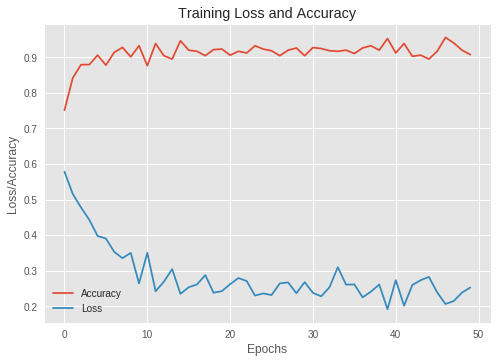

In [13]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_4.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_4.hdf5')

In [15]:
results['architecture_4'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 349s 11s/step


In [16]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_4'][0], 100 * results['architecture_4'][1]))

Test Loss: 0.28135155187919736 | Test Accuracy: 90.72%


### 5 tentativa Accuracy: 90.23%

Modelo adaptado do **Lucas Albertins**

*   Sem os **dropout**
*   Função **SGD** para compilação


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_5.hdf5', verbose=1, save_best_only=True)

In [20]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 3s - loss: 1.8421 - acc: 0.6531 - val_loss: 0.8560 - val_acc: 0.6615

Epoch 00001: val_loss improved from inf to 0.85596, saving model to weights_architecture_5.hdf5
Epoch 2/50
 - 1s - loss: 1.2014 - acc: 0.6828 - val_loss: 0.7799 - val_acc: 0.5990

Epoch 00002: val_loss improved from 0.85596 to 0.77991, saving model to weights_architecture_5.hdf5
Epoch 3/50
 - 1s - loss: 0.7652 - acc: 0.7203 - val_loss: 0.5808 - val_acc: 0.6615

Epoch 00003: val_loss improved from 0.77991 to 0.58079, saving model to weights_architecture_5.hdf5
Epoch 4/50
 - 1s - loss: 0.6858 - acc: 0.7328 - val_loss: 0.5996 - val_acc: 0.7135

Epoch 00004: val_loss did not improve from 0.58079
Epoch 5/50
 - 1s - loss: 0.5717 - acc: 0.7922 - val_loss: 0.5869 - val_acc: 0.7865

Epoch 00005: val_loss did not improve from 0.58079
Epoch 6/50
 - 1s - loss: 0.5214 - acc: 0.7859 - val_loss: 0.9213 - val_acc: 0.4583

Epoch 00006: val_loss did not improve from 0.58079
Epoch 7/50
 - 1s - loss: 0.5637 - acc: 0.7688 -

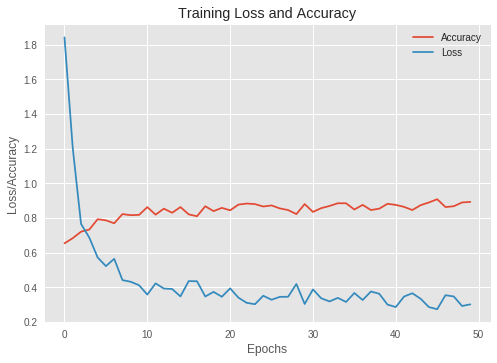

In [21]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_5.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_5.hdf5')

In [23]:
results['architecture_5'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 201s 6s/step


In [24]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_5'][0], 100 * results['architecture_5'][1]))

Test Loss: 0.34329717699438334 | Test Accuracy: 90.23%


### 6 tentativa Accuracy: 92.09%

Modelo adaptado do **Lucas Albertins**

*   Sem os **dropout**
*   Função **SGD** para compilação
*   **BatchNormalization** antes da ultima camada Dense


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(SGD(lr=0.03, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_6.hdf5', verbose=1, save_best_only=True)

In [28]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 3s - loss: 0.6098 - acc: 0.7188 - val_loss: 1.0684 - val_acc: 0.6927

Epoch 00001: val_loss improved from inf to 1.06840, saving model to weights_architecture_6.hdf5
Epoch 2/50
 - 1s - loss: 0.5556 - acc: 0.7766 - val_loss: 0.8130 - val_acc: 0.6979

Epoch 00002: val_loss improved from 1.06840 to 0.81301, saving model to weights_architecture_6.hdf5
Epoch 3/50
 - 1s - loss: 0.4985 - acc: 0.8516 - val_loss: 0.5092 - val_acc: 0.8021

Epoch 00003: val_loss improved from 0.81301 to 0.50918, saving model to weights_architecture_6.hdf5
Epoch 4/50
 - 1s - loss: 0.4770 - acc: 0.8578 - val_loss: 0.4656 - val_acc: 0.8125

Epoch 00004: val_loss improved from 0.50918 to 0.46558, saving model to weights_architecture_6.hdf5
Epoch 5/50
 - 1s - loss: 0.4524 - acc: 0.8703 - val_loss: 0.4045 - val_acc: 0.8906

Epoch 00005: val_loss improved from 0.46558 to 0.40448, saving model to weights_architecture_6.hdf5
Epoch 6/50
 - 1s - loss: 0.4021 - acc: 0.8859 - val_loss: 0.4656 - val_acc: 0.8646



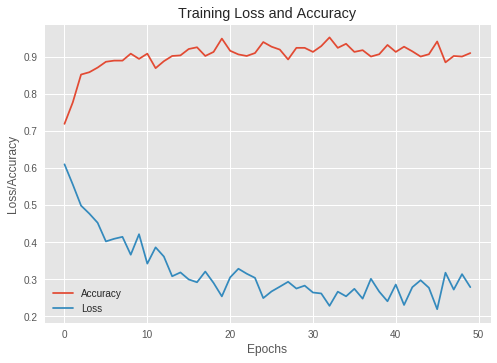

In [29]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_6.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_6.hdf5')

In [31]:
results['architecture_6'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 108s 3s/step


In [32]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_6'][0], 100 * results['architecture_6'][1]))

Test Loss: 0.2649589979555458 | Test Accuracy: 92.09%


### 7 tentativa Accuracy: 89.99%

Modelo adaptado do **Lucas Albertins**

*   Sem os **dropout**
*   Função **Adadelta** para compilação
*   **BatchNormalization** antes da ultima camada Dense


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adadelta

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_7.hdf5', verbose=1, save_best_only=True)

In [36]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 4s - loss: 0.6774 - acc: 0.6750 - val_loss: 0.9807 - val_acc: 0.5208

Epoch 00001: val_loss improved from inf to 0.98070, saving model to weights_architecture_7.hdf5
Epoch 2/50
 - 1s - loss: 0.5133 - acc: 0.8016 - val_loss: 0.4863 - val_acc: 0.8073

Epoch 00002: val_loss improved from 0.98070 to 0.48627, saving model to weights_architecture_7.hdf5
Epoch 3/50
 - 1s - loss: 0.4713 - acc: 0.8480 - val_loss: 0.4027 - val_acc: 0.8490

Epoch 00003: val_loss improved from 0.48627 to 0.40270, saving model to weights_architecture_7.hdf5
Epoch 4/50
 - 1s - loss: 0.4148 - acc: 0.8688 - val_loss: 0.2817 - val_acc: 0.9271

Epoch 00004: val_loss improved from 0.40270 to 0.28173, saving model to weights_architecture_7.hdf5
Epoch 5/50
 - 1s - loss: 0.4143 - acc: 0.8969 - val_loss: 0.3606 - val_acc: 0.8125

Epoch 00005: val_loss did not improve from 0.28173
Epoch 6/50
 - 1s - loss: 0.4123 - acc: 0.8828 - val_loss: 0.3910 - val_acc: 0.8594

Epoch 00006: val_loss did not improve from 0.2817

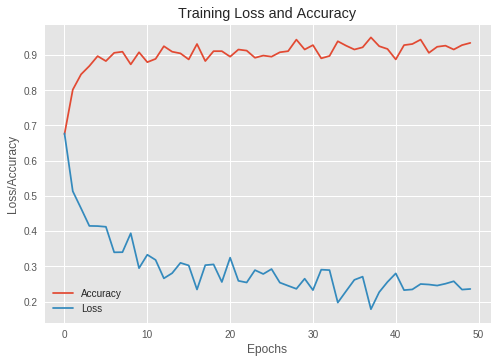

In [37]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_7.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_7.hdf5')

In [39]:
results['architecture_7'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 71s 2s/step


In [40]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_7'][0], 100 * results['architecture_7'][1]))

Test Loss: 0.30780918383970857 | Test Accuracy: 89.99%


### 8 tentativa Accuracy: 91.16%

Modelo adaptado do **Lucas Albertins**

*   Função **Adadelta** para compilação


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adadelta

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_8.hdf5', verbose=1, save_best_only=True)

In [44]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 4s - loss: 1.7423 - acc: 0.6656 - val_loss: 0.8759 - val_acc: 0.5521

Epoch 00001: val_loss improved from inf to 0.87590, saving model to weights_architecture_8.hdf5
Epoch 2/50
 - 1s - loss: 1.0613 - acc: 0.6906 - val_loss: 0.5597 - val_acc: 0.7656

Epoch 00002: val_loss improved from 0.87590 to 0.55966, saving model to weights_architecture_8.hdf5
Epoch 3/50
 - 1s - loss: 0.6809 - acc: 0.7672 - val_loss: 0.5113 - val_acc: 0.8229

Epoch 00003: val_loss improved from 0.55966 to 0.51126, saving model to weights_architecture_8.hdf5
Epoch 4/50
 - 1s - loss: 0.5601 - acc: 0.7531 - val_loss: 0.4771 - val_acc: 0.9115

Epoch 00004: val_loss improved from 0.51126 to 0.47711, saving model to weights_architecture_8.hdf5
Epoch 5/50
 - 1s - loss: 0.4149 - acc: 0.8328 - val_loss: 0.6418 - val_acc: 0.7708

Epoch 00005: val_loss did not improve from 0.47711
Epoch 6/50
 - 1s - loss: 0.5176 - acc: 0.8063 - val_loss: 0.5624 - val_acc: 0.7708

Epoch 00006: val_loss did not improve from 0.4771

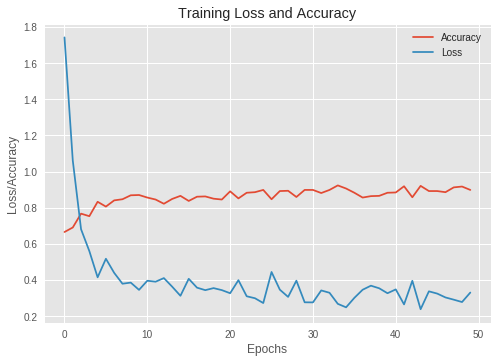

In [45]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_8.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_8.hdf5')

In [47]:
results['architecture_8'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 37s 1s/step


In [48]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_8'][0], 100 * results['architecture_8'][1]))

Test Loss: 0.27826320473104715 | Test Accuracy: 91.16%


### 9 tentativa Accuracy: 70.02%

Modelo adaptado do **Lucas Albertins**

*   Função **SGD** para compilação


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(SGD(lr=0.03, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_9.hdf5', verbose=1, save_best_only=True)

In [52]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 4s - loss: 3.2175 - acc: 0.7641 - val_loss: 3.9612 - val_acc: 0.7604

Epoch 00001: val_loss improved from inf to 3.96121, saving model to weights_architecture_9.hdf5
Epoch 2/50
 - 1s - loss: 3.0784 - acc: 0.8063 - val_loss: 3.4583 - val_acc: 0.7917

Epoch 00002: val_loss improved from 3.96121 to 3.45828, saving model to weights_architecture_9.hdf5
Epoch 3/50
 - 1s - loss: 3.2974 - acc: 0.7969 - val_loss: 3.8220 - val_acc: 0.7708

Epoch 00003: val_loss did not improve from 3.45828
Epoch 4/50
 - 1s - loss: 3.3582 - acc: 0.7875 - val_loss: 3.6821 - val_acc: 0.7031

Epoch 00004: val_loss did not improve from 3.45828
Epoch 5/50
 - 1s - loss: 3.6487 - acc: 0.7750 - val_loss: 3.8689 - val_acc: 0.5833

Epoch 00005: val_loss did not improve from 3.45828
Epoch 6/50
 - 1s - loss: 3.2983 - acc: 0.7969 - val_loss: 4.3621 - val_acc: 0.5521

Epoch 00006: val_loss did not improve from 3.45828
Epoch 7/50
 - 1s - loss: 3.8491 - acc: 0.7625 - val_loss: 4.3274 - val_acc: 0.5938

Epoch 00007:

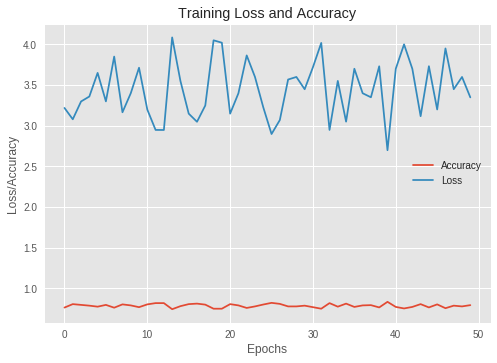

In [53]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_9.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_9.hdf5')

In [55]:
results['architecture_9'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 24s 741ms/step


In [56]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_9'][0], 100 * results['architecture_9'][1]))

Test Loss: 3.69662893936038 | Test Accuracy: 70.02%


### 10 tentativa Accuracy: 91.70%

Modelo adaptado do **Lucas Albertins**

*   Função **adam** para compilação
*   Adicionado mais 2 camadas convolutivas

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(96, (3, 3),activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(96, (3, 3),activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_10.hdf5', verbose=1, save_best_only=True)

In [60]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 6s - loss: 1.1817 - acc: 0.6578 - val_loss: 0.6099 - val_acc: 0.7344

Epoch 00001: val_loss improved from inf to 0.60993, saving model to weights_architecture_10.hdf5
Epoch 2/50
 - 1s - loss: 0.7331 - acc: 0.7375 - val_loss: 0.4076 - val_acc: 0.8802

Epoch 00002: val_loss improved from 0.60993 to 0.40765, saving model to weights_architecture_10.hdf5
Epoch 3/50
 - 1s - loss: 0.4727 - acc: 0.8281 - val_loss: 0.5808 - val_acc: 0.8333

Epoch 00003: val_loss did not improve from 0.40765
Epoch 4/50
 - 1s - loss: 0.4102 - acc: 0.8516 - val_loss: 0.4266 - val_acc: 0.8385

Epoch 00004: val_loss did not improve from 0.40765
Epoch 5/50
 - 1s - loss: 0.4765 - acc: 0.8333 - val_loss: 0.4677 - val_acc: 0.8333

Epoch 00005: val_loss did not improve from 0.40765
Epoch 6/50
 - 1s - loss: 0.4438 - acc: 0.8328 - val_loss: 0.3796 - val_acc: 0.8802

Epoch 00006: val_loss improved from 0.40765 to 0.37958, saving model to weights_architecture_10.hdf5
Epoch 7/50
 - 1s - loss: 0.4222 - acc: 0.821

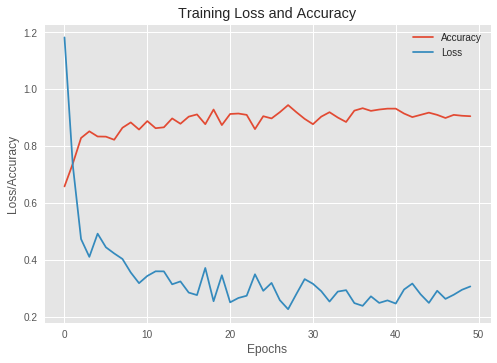

In [61]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_10.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_10.hdf5')

In [63]:
results['architecture_10'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 14s 437ms/step


In [64]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_10'][0], 100 * results['architecture_10'][1]))

Test Loss: 0.29190240101888776 | Test Accuracy: 91.70%


### 11 tentativa Accuracy: 82.03%

Modelo adaptado do **Lucas Albertins**

*   Função **SGD** para compilação
*   Adicionado mais 2 camadas convolutivas

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(96, (3, 3),activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(96, (3, 3),activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_11.hdf5', verbose=1, save_best_only=True)

In [68]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 5s - loss: 1.6143 - acc: 0.6234 - val_loss: 0.7192 - val_acc: 0.8125

Epoch 00001: val_loss improved from inf to 0.71915, saving model to weights_architecture_11.hdf5
Epoch 2/50
 - 1s - loss: 1.1094 - acc: 0.6906 - val_loss: 0.6679 - val_acc: 0.6562

Epoch 00002: val_loss improved from 0.71915 to 0.66786, saving model to weights_architecture_11.hdf5
Epoch 3/50
 - 1s - loss: 0.8418 - acc: 0.7297 - val_loss: 0.7146 - val_acc: 0.6615

Epoch 00003: val_loss did not improve from 0.66786
Epoch 4/50
 - 1s - loss: 0.7312 - acc: 0.7078 - val_loss: 0.6832 - val_acc: 0.7083

Epoch 00004: val_loss did not improve from 0.66786
Epoch 5/50
 - 1s - loss: 0.6780 - acc: 0.7219 - val_loss: 0.7583 - val_acc: 0.5469

Epoch 00005: val_loss did not improve from 0.66786
Epoch 6/50
 - 1s - loss: 0.6267 - acc: 0.7422 - val_loss: 0.6574 - val_acc: 0.8177

Epoch 00006: val_loss improved from 0.66786 to 0.65741, saving model to weights_architecture_11.hdf5
Epoch 7/50
 - 1s - loss: 0.5664 - acc: 0.754

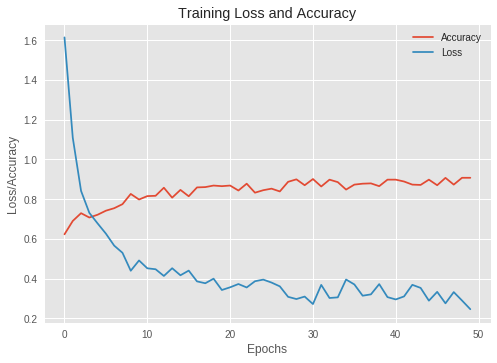

In [69]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_11.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_11.hdf5')

In [71]:
results['architecture_11'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 10s 315ms/step


In [72]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_11'][0], 100 * results['architecture_11'][1]))

Test Loss: 0.3931142007932067 | Test Accuracy: 82.03%


### 12 tentativa Accuracy: 88.23%

Modelo adaptado do **Lucas Albertins**

*   Sem utilização das funções de regularização
*   Função **SGD** para compilação
*   Adicionado mais 2 camadas convolutivas

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(96, (3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(96, (3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_12.hdf5', verbose=1, save_best_only=True)

In [76]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 5s - loss: 1.4555 - acc: 0.6312 - val_loss: 0.5835 - val_acc: 0.8021

Epoch 00001: val_loss improved from inf to 0.58353, saving model to weights_architecture_12.hdf5
Epoch 2/50
 - 1s - loss: 0.8472 - acc: 0.7484 - val_loss: 0.6332 - val_acc: 0.6198

Epoch 00002: val_loss did not improve from 0.58353
Epoch 3/50
 - 1s - loss: 0.7756 - acc: 0.7078 - val_loss: 0.4629 - val_acc: 0.7812

Epoch 00003: val_loss improved from 0.58353 to 0.46288, saving model to weights_architecture_12.hdf5
Epoch 4/50
 - 1s - loss: 0.6145 - acc: 0.7594 - val_loss: 0.5048 - val_acc: 0.7760

Epoch 00004: val_loss did not improve from 0.46288
Epoch 5/50
 - 1s - loss: 0.5574 - acc: 0.7719 - val_loss: 0.4502 - val_acc: 0.8177

Epoch 00005: val_loss improved from 0.46288 to 0.45021, saving model to weights_architecture_12.hdf5
Epoch 6/50
 - 1s - loss: 0.5530 - acc: 0.7578 - val_loss: 0.4686 - val_acc: 0.7396

Epoch 00006: val_loss did not improve from 0.45021
Epoch 7/50
 - 1s - loss: 0.4724 - acc: 0.776

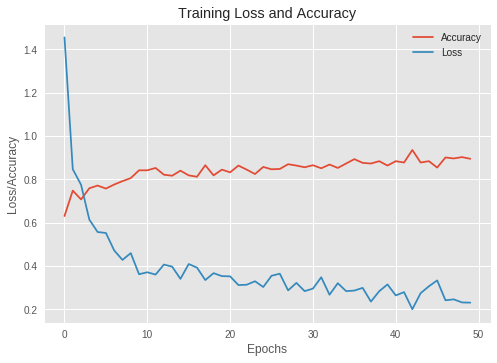

In [77]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_12.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_12.hdf5')

In [79]:
results['architecture_12'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 7s 212ms/step


In [80]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_12'][0], 100 * results['architecture_12'][1]))

Test Loss: 0.2687366446480155 | Test Accuracy: 88.23%
